# Part 1 ‐ Exploratory  Analysis for User Logins Data

Ultimate Technologies Inc. is an American worldwide online transportation network company that has disrupted the taxi and logistics industry and is a prestigious companies to work at. 
<br>This challenge has been adapted from an actual Ultimate Inc. data science challenge.

So. let's start exploring!

## Import Libraries

In [1]:
import json
import pandas as pd
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

The logins.json file contains (simulated) timestamps of user logins in a particular geographic location. 

In [2]:
# Load logins data
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


#### Sort the Login Time Column

In [4]:
df = df.sort_values('login_time')
df.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


#### Set an Index for Login_Time Column

In [5]:
df.set_index('login_time', inplace=True)

## Feature Extraction

### 1. Get Login Count Aggregating 15 Minutes Time

In [6]:
# initializing count column for timestamps
df['count'] = 1

In [7]:
df.head(10)

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
1970-01-01 20:21:41,1
1970-01-01 20:26:05,1
1970-01-01 20:26:21,1
1970-01-01 20:31:03,1


In [8]:
df_logins = df.resample('15T').count()
df_logins = df_logins.reset_index()
df_logins.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


#### Convert Login_time to Datetime

In [9]:
df_logins['login_time'] = pd.to_datetime(df_logins['login_time'])

In [10]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
login_time    9788 non-null datetime64[ns]
count         9788 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.0 KB


### 2. Get Login Year

In [11]:
df_logins['year'] = df_logins['login_time'].dt.year
df_logins['year'] = df_logins.year.astype('category')
df_logins['year'].unique()

[1970]
Categories (1, int64): [1970]

There is data only for a single year 1970.

### 3. Get Login Month

In [12]:
df_logins['month'] = df_logins['login_time'].dt.strftime('%B')
df_logins['month'] = df_logins.month.astype('category')

### 4. Get Login Day Of Week

In [13]:
df_logins['day_of_week'] = df_logins['login_time'].dt.day_name()
df_logins['day_of_week'] = df_logins.day_of_week.astype('category')

### 5. Get Hour of Login

In [14]:
df_logins['hour'] = df_logins['login_time'].dt.hour
df_logins['hour'] = df_logins.hour.astype('category')

Now, Let's take a look at our data.

In [15]:
df_logins.head()

,login_time,count,year,month,day_of_week,hour
0,1970-01-01 20:00:00,2,1970,January,Thursday,20
1,1970-01-01 20:15:00,6,1970,January,Thursday,20
2,1970-01-01 20:30:00,9,1970,January,Thursday,20
3,1970-01-01 20:45:00,7,1970,January,Thursday,20
4,1970-01-01 21:00:00,1,1970,January,Thursday,21


## Data Visualization

### 1. Month

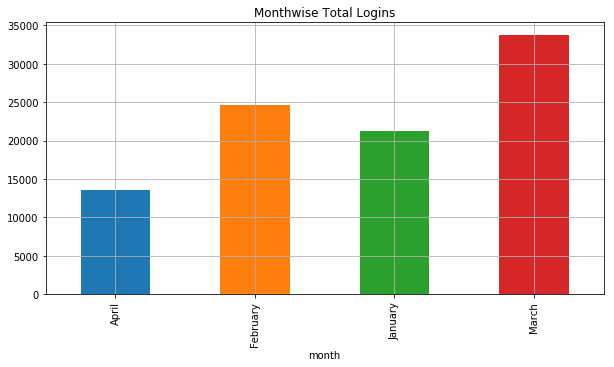

In [16]:
df_logins.groupby("month")["count"].sum().plot("bar",figsize=(10,5), title = "Monthwise Total Logins",grid = True)

**Observation: March has the maximum Logins and April has the Minimum.**

### 2. Day Of Week

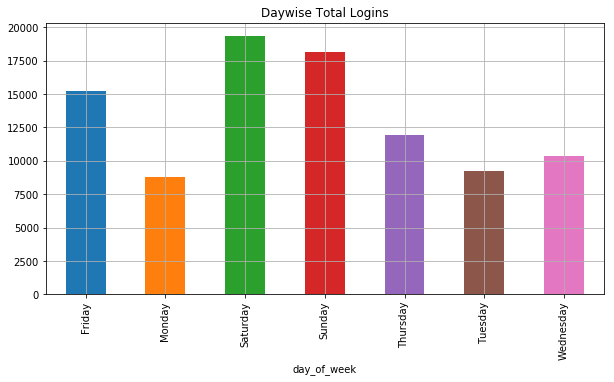

In [17]:
df_logins.groupby("day_of_week")["count"].sum().plot("bar",figsize=(10,5), title = "Daywise Total Logins", grid = True)

**Observation: Logins are maximum on Saturdays and least on Mondays.**

### 3. Hour Of the Day

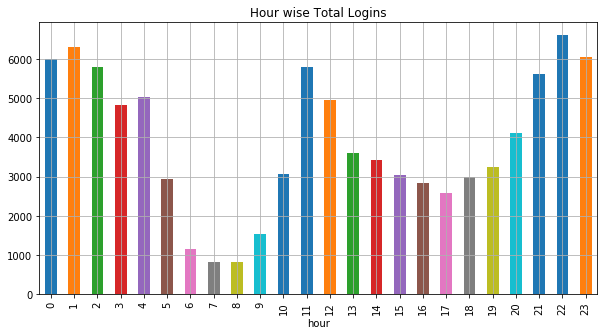

In [18]:
df_logins.groupby("hour")["count"].sum().plot("bar",figsize=(10,5), title = "Hour wise Total Logins", grid = True)

**Observation: At night hours, there are more Logins.**

### Login Frequency By Day and Hour

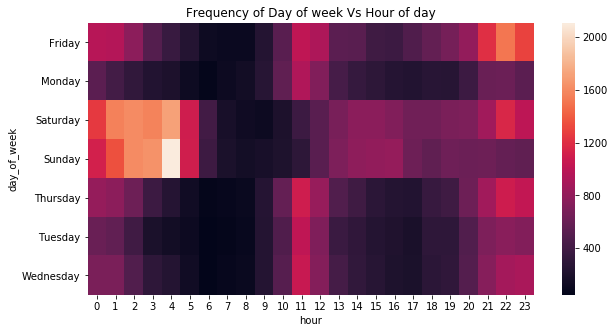

In [19]:
grouped_df = df_logins.groupby(["day_of_week", "hour"])["count"].aggregate("sum").reset_index()
grouped_df = grouped_df.pivot('day_of_week', 'hour', 'count')

plt.figure(figsize=(10,5))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

**Observation: The above Heatmap also confirms that there are more Logins on Weekend Mornings.**